<a href="https://colab.research.google.com/github/nikitosssobur/My-ML-Projects/blob/main/XOR_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Building tiny model for the solution of XOR task.


In [2]:
#Dataset creation
x_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_train = np.array([0, 1, 1, 0])

In [3]:
#Building the model
model = Sequential()
model.add(Dense(5, input_dim = 2, activation= 'linear', kernel_initializer = 'he_normal',
    bias_initializer = 'he_normal'))
model.add(Dense(5, input_dim = 5, activation= 'tanh', kernel_initializer = 'he_normal',
    bias_initializer = 'he_normal'))
model.add(Dense(1, input_dim = 5, activation= 'linear', kernel_initializer = 'he_normal',
    bias_initializer = 'he_normal'))

In [4]:
#Hyperparameters
lr, momentum = 0.005, 0.9
clipnorm = 0.001
epochs = 200

In [5]:
#Optimizers
opt = SGD(learning_rate = lr, momentum = momentum, nesterov = True)
opt2 = Adam(learning_rate = lr, clipnorm = clipnorm)

In [6]:
#Training loop
model.compile(loss = 'mean_squared_error', optimizer = opt2)
model.fit(x_train, y_train, epochs = epochs, verbose = 2)

Epoch 1/200
1/1 - 1s - loss: 3.7917 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 3.5647 - 9ms/epoch - 9ms/step
Epoch 3/200
1/1 - 0s - loss: 3.3455 - 8ms/epoch - 8ms/step
Epoch 4/200
1/1 - 0s - loss: 3.1344 - 7ms/epoch - 7ms/step
Epoch 5/200
1/1 - 0s - loss: 2.9314 - 9ms/epoch - 9ms/step
Epoch 6/200
1/1 - 0s - loss: 2.7364 - 8ms/epoch - 8ms/step
Epoch 7/200
1/1 - 0s - loss: 2.5493 - 8ms/epoch - 8ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3695 - 7ms/epoch - 7ms/step
Epoch 9/200
1/1 - 0s - loss: 2.1970 - 8ms/epoch - 8ms/step
Epoch 10/200
1/1 - 0s - loss: 2.0314 - 7ms/epoch - 7ms/step
Epoch 11/200
1/1 - 0s - loss: 1.8731 - 8ms/epoch - 8ms/step
Epoch 12/200
1/1 - 0s - loss: 1.7221 - 6ms/epoch - 6ms/step
Epoch 13/200
1/1 - 0s - loss: 1.5788 - 7ms/epoch - 7ms/step
Epoch 14/200
1/1 - 0s - loss: 1.4435 - 6ms/epoch - 6ms/step
Epoch 15/200
1/1 - 0s - loss: 1.3166 - 7ms/epoch - 7ms/step
Epoch 16/200
1/1 - 0s - loss: 1.1982 - 7ms/epoch - 7ms/step
Epoch 17/200
1/1 - 0s - loss: 1.0888 - 7ms/epoch - 

Model validation


In [7]:
#Creating meshgrid for building dividing plane
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = (Z > 0.5).astype(int)
#Z = Z.astype(int)
Z = Z.reshape(xx.shape)

458/458 [==============================] - 1s 2ms/step


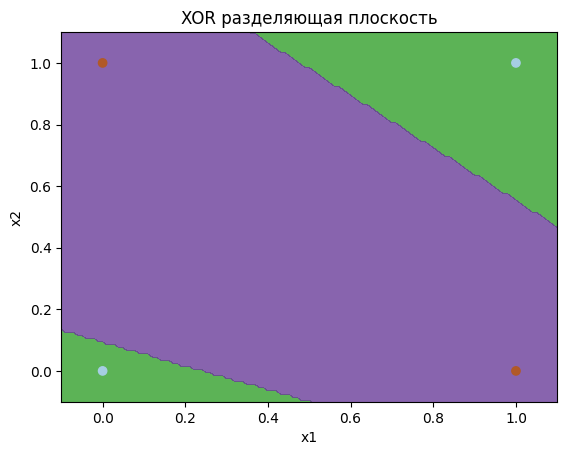

In [8]:
plt.contourf(xx, yy, Z, 1, cmap = plt.cm.Paired, alpha = 0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train, cmap = plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR разделяющая плоскость')
plt.show()